In [1]:
"""
Title: Movie Review Sentiment Analysis
Author: Abhinav Thukral
Description: Implemented text analysis using machine learning models to classify movie review sentiments as positive or negative.
"""

#Importing Essentials
import pandas as pd
import re

from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop=stopwords.words('english')

#My Imports 
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Graviton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path = 'data/Train.csv'
data = pd.read_csv(path,header=None,skiprows=1,names=['text','label'])
data = data.astype(str)
# print(data.describe())

###Pre-Processing
def preprocessor(text):
	 text=re.sub('<[^>]*>','',text)
	 emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
	 text=re.sub('[\W]+',' ',text.lower()) +\
		' '.join(emojis).replace('-','')
	 return text

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

data['text']=data['text'].apply(preprocessor)

porter=PorterStemmer()

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True, min_df=0, max_df=0.8)

X = tfidf.fit_transform(data.text)
y = data.label.values


In [3]:
df = pd.DataFrame(columns=['Training Percentage','Sensitivity','Specificity','Accuracy','F1','FDR','FNR','NPV','FPR','Precision','MCC'])
df

,Training Percentage,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC


In [4]:
def Evaluation(CM, training_percentage,picno):
	global df
	values = {}
    
	TN = CM[0][0]
	FP = CM[0][1]
	FN = CM[1][0]
	TP = CM[1][1]
	P = TP+FN
	N = TN+FP

	Accuracy = (TP+TN)/(TP+TN+FP+FN)
	Precision = TP/(FP+TP)
	Recall =TP/(FN+TP) 

	F1 = 2*(Precision*Recall)/(Precision+Recall)
	Sensitivity = TP/(P)
	Specificity = TN/(N)

	FPR = FP/(N)
	FNR = FN/(P)
	NPV = TN/(TN+FN)
	FDR = FP/(FP+TP)

	MCC = ((TP*TN)- (FP*FN))/((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5

	values["Accuracy"] = Accuracy
	values["Precision"] = Precision
	values["F1"] = F1
	values["Sensitivity"] = Sensitivity
	values["Specificity"] = Specificity
	values["FPR"] = FPR
	values["FNR"] = FNR
	values["NPV"] = NPV
	values["FDR"] = FDR
	values["MCC"] = MCC
	values["Training Percentage"] = training_percentage 
    
	print("Accuracy from CM: ", Accuracy)
	print("Precision from CM: ", Precision)
	print("Recall from CM: ", Recall)

	print("F1-Score from CM: ", F1)
	print("Sensitivity from CM: ", Sensitivity)
	print("Specificity from CM: ", Specificity)

	print("FPR from CM: ", FPR)
	print("FNR from CM: ", FNR)
	print("NPV from CM: ", NPV)
	print("FDR from CM: ", FDR)

	print("MCC from CM: ", MCC)
    
	visualize_confusion_matrix(CM, picno)
	df = df.append(values, ignore_index = True)
	display(df)
    
    

def visualize_confusion_matrix(CM, picno):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in CM.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in CM.flatten()/np.sum(CM)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(CM, annot=labels, fmt="", cmap='Blues')
        
    plt.savefig('plot_CM'+str(picno)+'.png', dpi=300)
    plt.show()



Support Vector Machine
Confusion Matrix: 
[[7115  963]
 [ 781 7141]]
Accuracy from CM:  0.891
Precision from CM:  0.8811697926949654
Recall from CM:  0.9014137843978793
F1-Score from CM:  0.8911768376388368
Sensitivity from CM:  0.9014137843978793
Specificity from CM:  0.8807873235949493
FPR from CM:  0.11921267640505076
FNR from CM:  0.09858621560212068
NPV from CM:  0.9010891590678825
FDR from CM:  0.11883020730503455
MCC from CM:  0.7822300293431647


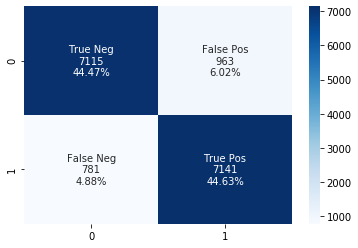

,Training Percentage,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC
0,0.6,0.901414,0.880787,0.891,0.891177,0.11883,0.098586,0.901089,0.119213,0.88117,0.78223


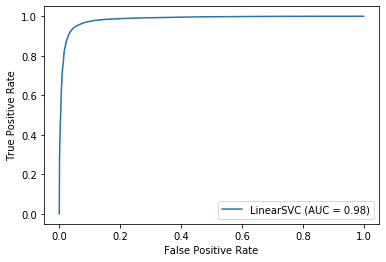


Support Vector Machine
Confusion Matrix: 
[[5282  712]
 [ 583 5423]]
Accuracy from CM:  0.8920833333333333
Precision from CM:  0.8839445802770987
Recall from CM:  0.9029304029304029
F1-Score from CM:  0.8933366279548637
Sensitivity from CM:  0.9029304029304029
Specificity from CM:  0.8812145478812146
FPR from CM:  0.11878545211878545
FNR from CM:  0.09706959706959707
NPV from CM:  0.9005967604433077
FDR from CM:  0.11605541972290138
MCC from CM:  0.7843431207251603


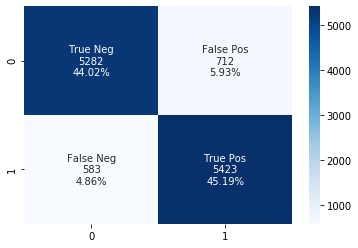

,Training Percentage,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC
0,0.6,0.901414,0.880787,0.891000,0.891177,0.118830,0.098586,0.901089,0.119213,0.881170,0.782230
1,0.7,0.902930,0.881215,0.892083,0.893337,0.116055,0.097070,0.900597,0.118785,0.883945,0.784343


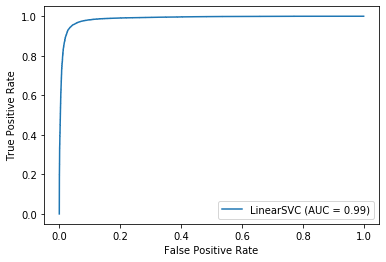


Support Vector Machine
Confusion Matrix: 
[[3545  490]
 [ 378 3587]]
Accuracy from CM:  0.8915
Precision from CM:  0.87981358842286
Recall from CM:  0.9046658259773014
F1-Score from CM:  0.892066650087043
Sensitivity from CM:  0.9046658259773014
Specificity from CM:  0.8785625774473358
FPR from CM:  0.12143742255266418
FNR from CM:  0.09533417402269861
NPV from CM:  0.9036451695131277
FDR from CM:  0.12018641157714005
MCC from CM:  0.7833435722128911


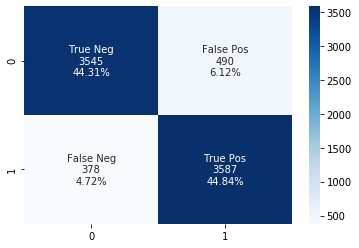

,Training Percentage,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC
0,0.6,0.901414,0.880787,0.891000,0.891177,0.118830,0.098586,0.901089,0.119213,0.881170,0.782230
1,0.7,0.902930,0.881215,0.892083,0.893337,0.116055,0.097070,0.900597,0.118785,0.883945,0.784343
2,0.8,0.904666,0.878563,0.891500,0.892067,0.120186,0.095334,0.903645,0.121437,0.879814,0.783344


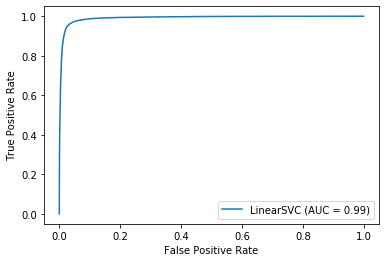

In [5]:
picno = 0
for i in range(6,9,1):
    X_train_dtm, X_test_dtm, y_train, y_test = train_test_split(X,y,random_state=1, train_size= i/10)
    #Accuracy using SVM Model
    SVM = LinearSVC()
    SVM.fit(X_train_dtm, y_train)
    y_pred = SVM.predict(X_test_dtm)
    print('\nSupport Vector Machine')

    # Accuracy = metrics.accuracy_score(y_test,y_pred)*100
    CM = metrics.confusion_matrix(y_test,y_pred)
    # print('Accuracy Score: ',Accuracy,'%',sep='')
    print('Confusion Matrix: ',CM, sep = '\n')
    picno+=1
    Evaluation(CM,i/10,picno)  
    metrics.plot_roc_curve(SVM, X, y)
    picno+=1
    plt.savefig('plot_SVM'+str(picno)+'.png', dpi=300)
    plt.show()

In [6]:
display(df)

,Training Percentage,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC
0,0.6,0.901414,0.880787,0.891000,0.891177,0.118830,0.098586,0.901089,0.119213,0.881170,0.782230
1,0.7,0.902930,0.881215,0.892083,0.893337,0.116055,0.097070,0.900597,0.118785,0.883945,0.784343
2,0.8,0.904666,0.878563,0.891500,0.892067,0.120186,0.095334,0.903645,0.121437,0.879814,0.783344


In [7]:
graphs = ['Sensitivity','Specificity','Accuracy','F1','FDR','FNR','NPV','FPR','Precision','MCC']

D:\PythonEverything\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


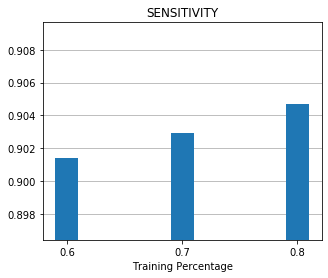

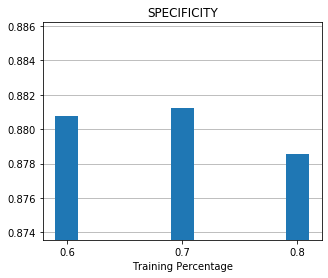

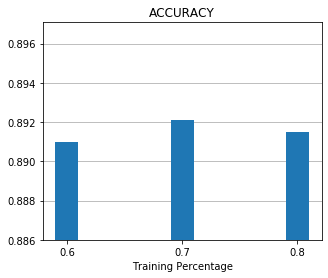

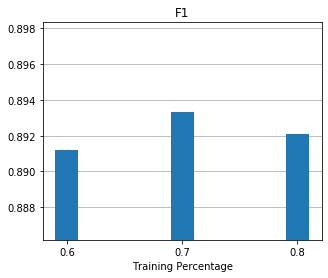

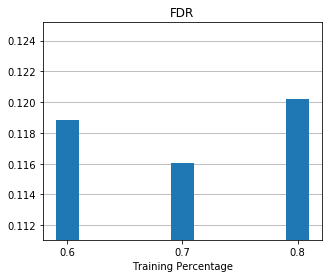

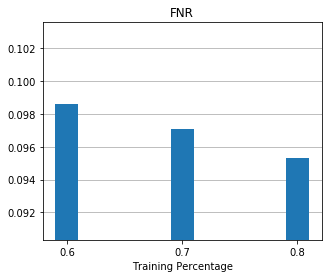

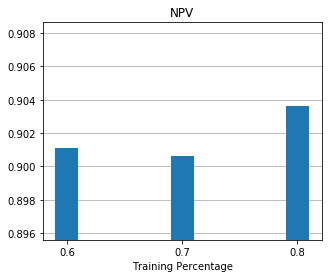

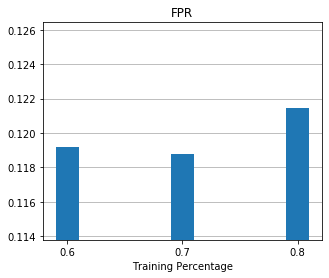

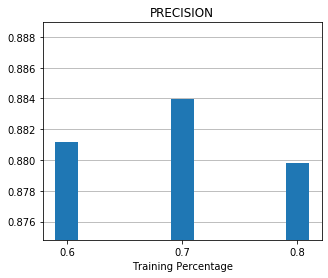

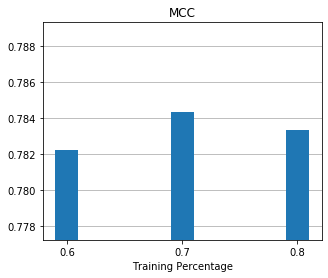

In [8]:

for graph in graphs:
    fig = plt.figure(figsize = (5, 4))
    low = min(df[graph])
    high = max(df[graph])
    plt.ylim(low-0.005, high + 0.005)
    plt.grid(axis = 'y')
    ax = plt.axes()
    ax.set_axisbelow(True)
    plt.xlabel("Training Percentage")
    plt.title(graph.upper())
    x = df['Training Percentage']
    x_pos = [i for i, _ in enumerate(x)]
    plt.xticks(x_pos, x)
    plt.bar(('60','70','80'),df[graph],align='center', width=0.2)
    
    picno+=1
    plt.savefig('plot_Eval' + str(picno) + '.png', dpi=300)

In [9]:
df = pd.DataFrame(columns=['Sensitivity','Specificity','Accuracy','F1','FDR','FNR','NPV','FPR','Precision','MCC'])
df

,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC



K Nearest Neighbors (NN = 3)
Confusion Matrix: 
[[5671 2407]
 [1454 6468]]
Accuracy from CM:  0.7586875
Precision from CM:  0.7287887323943661
Recall from CM:  0.8164604897753093
F1-Score from CM:  0.7701375245579568
Sensitivity from CM:  0.8164604897753093
Specificity from CM:  0.70203020549641
FPR from CM:  0.29796979450359
FNR from CM:  0.18353951022469073
NPV from CM:  0.7959298245614035
FDR from CM:  0.2712112676056338
MCC from CM:  0.5215953310929559


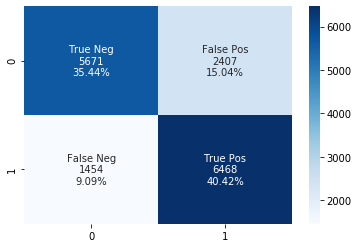

,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC,Training Percentage
0,0.81646,0.70203,0.758687,0.770138,0.271211,0.18354,0.79593,0.29797,0.728789,0.521595,0.6


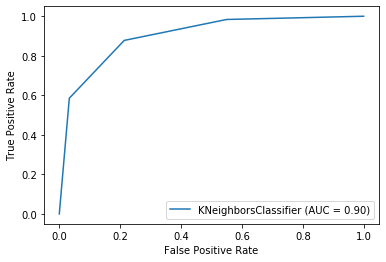


K Nearest Neighbors (NN = 3)
Confusion Matrix: 
[[4239 1755]
 [1073 4933]]
Accuracy from CM:  0.7643333333333333
Precision from CM:  0.7375897129186603
Recall from CM:  0.8213453213453213
F1-Score from CM:  0.7772175831101307
Sensitivity from CM:  0.8213453213453213
Specificity from CM:  0.7072072072072072
FPR from CM:  0.2927927927927928
FNR from CM:  0.17865467865467866
NPV from CM:  0.7980045180722891
FDR from CM:  0.26241028708133973
MCC from CM:  0.5320617305054117


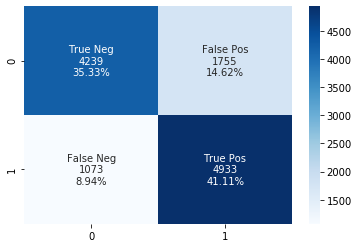

,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC,Training Percentage
0,0.816460,0.702030,0.758687,0.770138,0.271211,0.183540,0.795930,0.297970,0.728789,0.521595,0.6
1,0.821345,0.707207,0.764333,0.777218,0.262410,0.178655,0.798005,0.292793,0.737590,0.532062,0.7


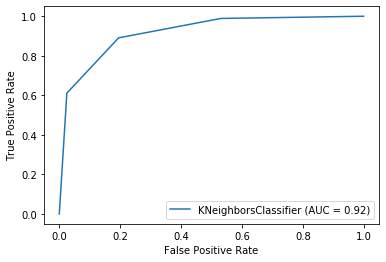


K Nearest Neighbors (NN = 3)
Confusion Matrix: 
[[2863 1172]
 [ 703 3262]]
Accuracy from CM:  0.765625
Precision from CM:  0.7356788452864231
Recall from CM:  0.8226986128625473
F1-Score from CM:  0.7767591379926182
Sensitivity from CM:  0.8226986128625473
Specificity from CM:  0.7095415117719951
FPR from CM:  0.29045848822800496
FNR from CM:  0.17730138713745272
NPV from CM:  0.8028603477285474
FDR from CM:  0.2643211547135769
MCC from CM:  0.5353803948697353


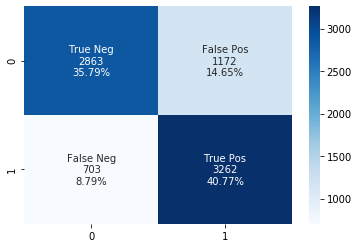

,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC,Training Percentage
0,0.816460,0.702030,0.758687,0.770138,0.271211,0.183540,0.795930,0.297970,0.728789,0.521595,0.6
1,0.821345,0.707207,0.764333,0.777218,0.262410,0.178655,0.798005,0.292793,0.737590,0.532062,0.7
2,0.822699,0.709542,0.765625,0.776759,0.264321,0.177301,0.802860,0.290458,0.735679,0.535380,0.8


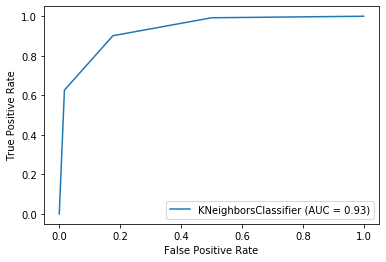

In [10]:
for i in range(6,9,1):
    X_train_dtm, X_test_dtm, y_train, y_test = train_test_split(X,y,random_state=1, train_size= i/10)
    #Accuracy using KNN Model
    KNN = KNeighborsClassifier(n_neighbors = 3)
    KNN.fit(X_train_dtm, y_train)
    y_pred = KNN.predict(X_test_dtm)
    print('\nK Nearest Neighbors (NN = 3)')

    # Accuracy = metrics.accuracy_score(y_test,y_pred)*100
    CM = metrics.confusion_matrix(y_test,y_pred)
    # print('Accuracy Score: ',Accuracy,'%',sep='')
    print('Confusion Matrix: ',CM, sep = '\n')
    picno+=1
    Evaluation(CM,i/10,picno)
    metrics.plot_roc_curve(KNN, X, y)
    picno+=1
    plt.savefig('plot_KNN'+str(picno)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
display(df)

,Sensitivity,Specificity,Accuracy,F1,FDR,FNR,NPV,FPR,Precision,MCC,Training Percentage
0,0.816460,0.702030,0.758687,0.770138,0.271211,0.183540,0.795930,0.297970,0.728789,0.521595,0.6
1,0.821345,0.707207,0.764333,0.777218,0.262410,0.178655,0.798005,0.292793,0.737590,0.532062,0.7
2,0.822699,0.709542,0.765625,0.776759,0.264321,0.177301,0.802860,0.290458,0.735679,0.535380,0.8


D:\PythonEverything\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


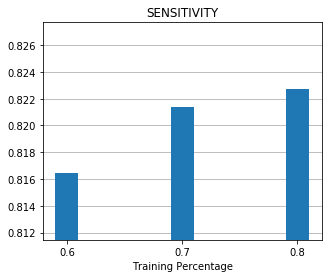

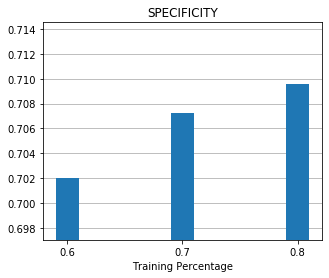

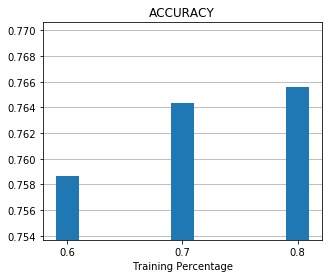

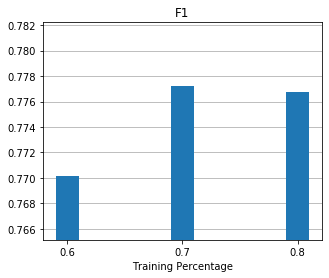

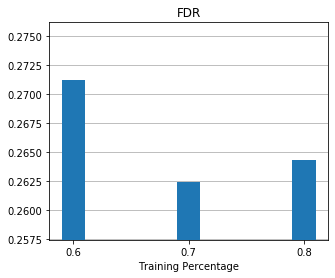

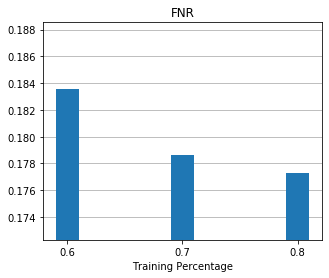

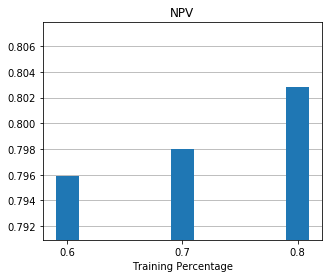

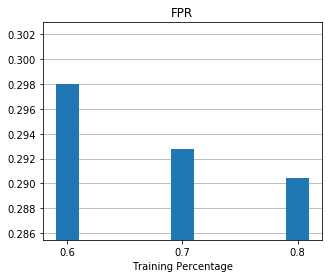

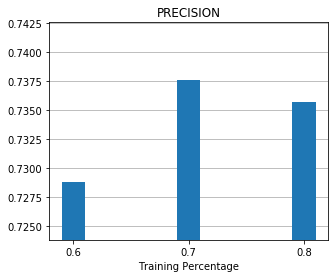

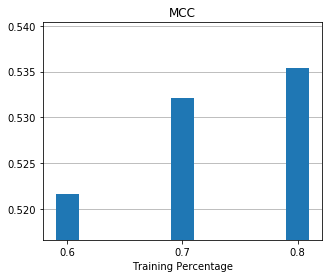

In [12]:
for graph in graphs:
    fig = plt.figure(figsize = (5, 4))
    low = min(df[graph])
    high = max(df[graph])
    plt.ylim(low-0.005, high + 0.005)
    plt.grid(axis = 'y')
    ax = plt.axes()
    ax.set_axisbelow(True)
    plt.xlabel("Training Percentage")
    plt.title(graph.upper())
    x = df['Training Percentage']
    x_pos = [i for i, _ in enumerate(x)]
    plt.xticks(x_pos, x)
    plt.bar(('60','70','80'),df[graph],align='center', width=0.2)
    
    picno+=1
    plt.savefig('plot_Eval' + str(picno) + '.png')

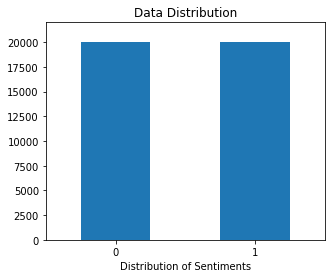

In [13]:
fig = plt.figure(figsize = (5, 4))
low = 0
high = 22000
plt.ylim(low-0.5, high + 0.5)
plt.xlim(-0.5,1.5)
# plt.grid(axis = 'y')
# ax = plt.axes()
# ax.set_axisbelow(True)
plt.xlabel("Distribution of Sentiments")
plt.title("Data Distribution")
x = data['label']
# x_pos = [i for i, _ in enumerate(x)]


plt.hist(x,bins= np.arange(3)-0.25, width = 0.5, align='mid')
plt.xticks([0,1])
picno+=1
plt.savefig('plot_Data27.png', dpi=300, bbox_inches='tight')

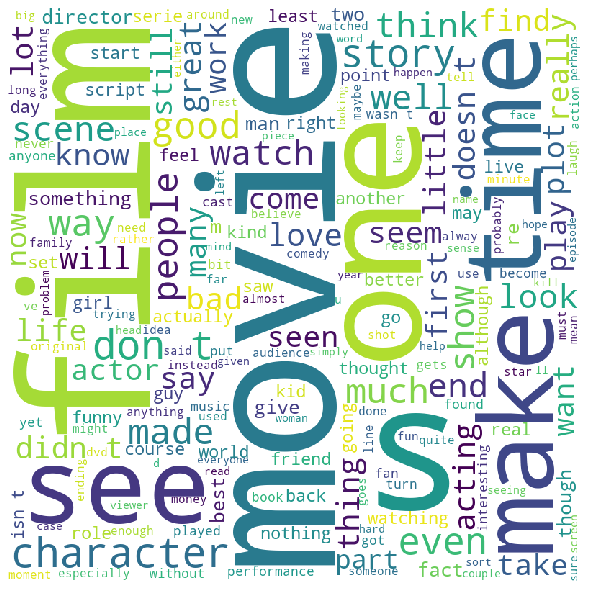

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in data.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('plot_wordcloud.png', dpi=300, bbox_inches='tight')  
plt.show()

In [28]:
import matplotlib

txt = data.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')


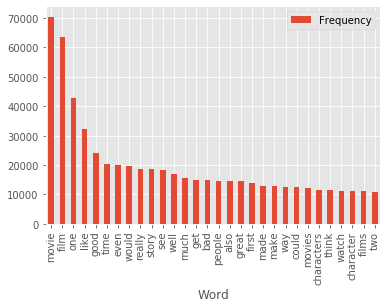

In [29]:

rslt.plot.bar(rot=90)
plt.savefig('plot_freq.png', dpi=300, bbox_inches='tight')  